In [1]:
# only pandas is required
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv', encoding='latin1')
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [3]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df[df.columns[:12]]
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Content Type Distribution

How is content distributed between movies and TV shows on Netflix?

In [5]:
df.type.value_counts()

type
Movie      6132
TV Show    2677
Name: count, dtype: int64

# Release Year Analysis

What trends can be observed in the release years of content added to Netflix? Has there been an increase in recent content over the years?


<Axes: xlabel='release_year'>

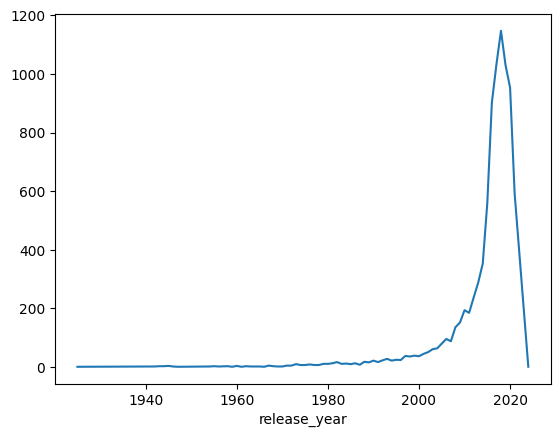

In [6]:
(
    df.release_year
      .value_counts()
      .sort_index()
      .plot(kind='line')
)

<Axes: xlabel='date_added'>

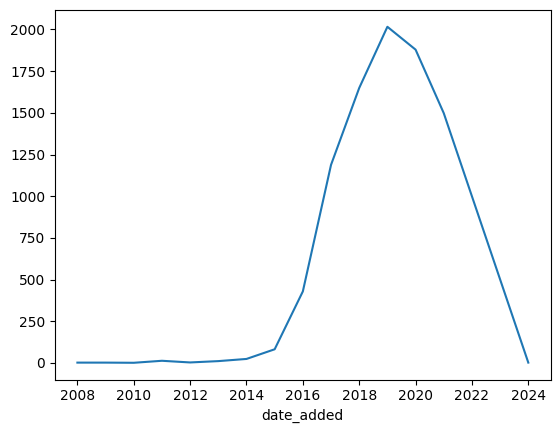

In [7]:
df.dropna(subset=['date_added'], inplace=True)
df.date_added = df.date_added.str.strip()
df.date_added = pd.to_datetime(df.date_added)

(
    df.date_added
      .dt.year
      .value_counts()
      .sort_index()
      .plot(kind='line')
)

# Geographic Distribution
Which countries produce the most content available on Netflix? Are there noticeable differences in the type of content (movies vs. TV shows)?

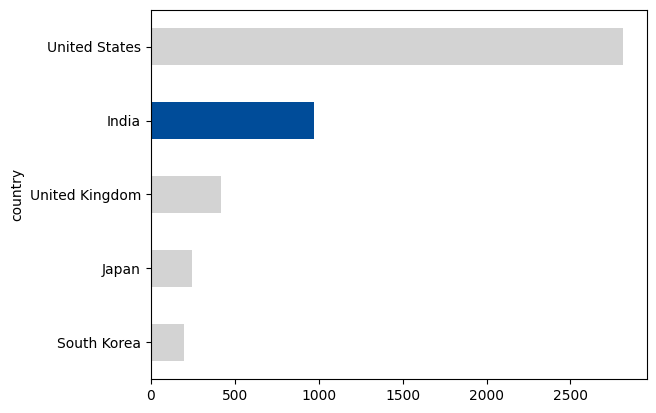

In [8]:
ax = df.country.value_counts().nlargest(5).sort_values(ascending=True).plot(kind='barh',  color='lightgray')

bars = ax.patches
bars[-2].set_facecolor('#004c99')

<Axes: >

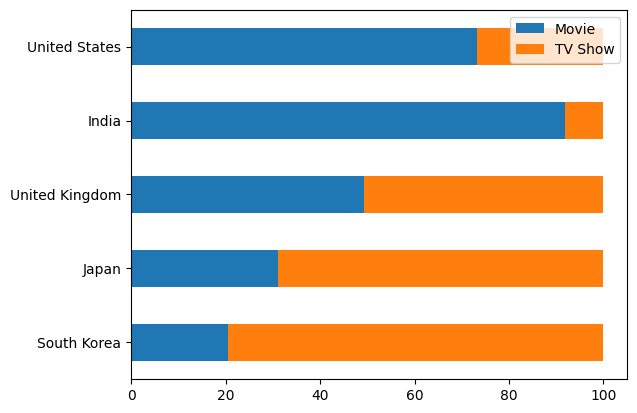

In [9]:
index = []
row = []
for c in ['United States', 'India', 'United Kingdom', 'Japan', 'South Korea'][::-1]:
  cnt = df[df.country==c].type.value_counts()  
  total = cnt['Movie'] + cnt['TV Show']
  index.append(c)
  row.append([cnt['Movie']/total*100, cnt['TV Show']/total*100,] )
cnt = pd.DataFrame(row, columns=['Movie', 'TV Show'], index=index)
cnt.plot(kind='barh', stacked=True)

# Rating Analysis
What is the distribution of content ratings on Netflix? How does content rating vary between different countries or regions?

<Axes: ylabel='rating'>

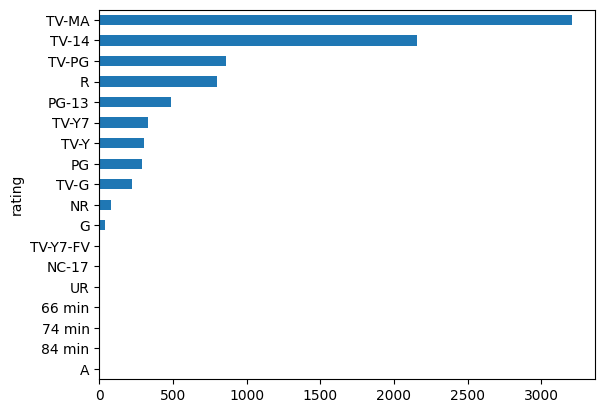

In [10]:
df.rating.value_counts().sort_values().plot(kind='barh')

<Axes: xlabel='rating'>

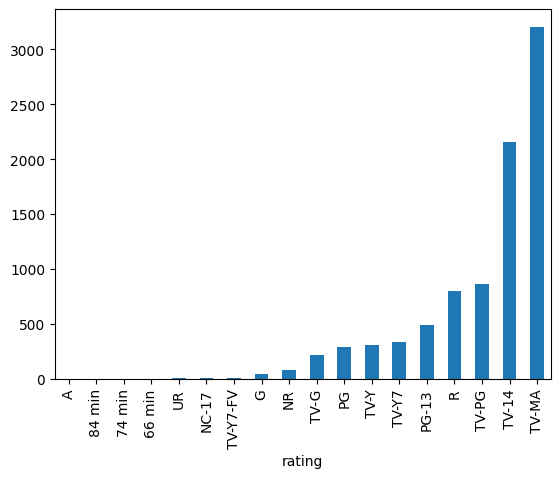

In [11]:
df.rating.value_counts().sort_values().plot(kind='bar')

# Duration Insights

What are the common durations for movies and TV shows? Is there a trend in the duration of content over the years?

<Axes: ylabel='Frequency'>

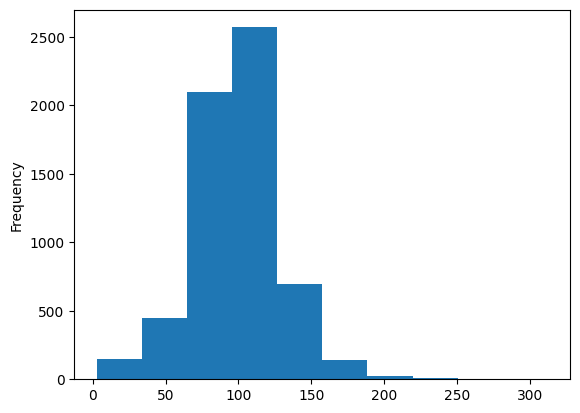

In [12]:
movie = df[df.type=='Movie'].copy()
movie.duration = movie.duration.str.split(expand=True)[0]
movie.duration = pd.to_numeric(movie.duration)
movie.duration.plot(kind='hist')

<Axes: xlabel='len_cat'>

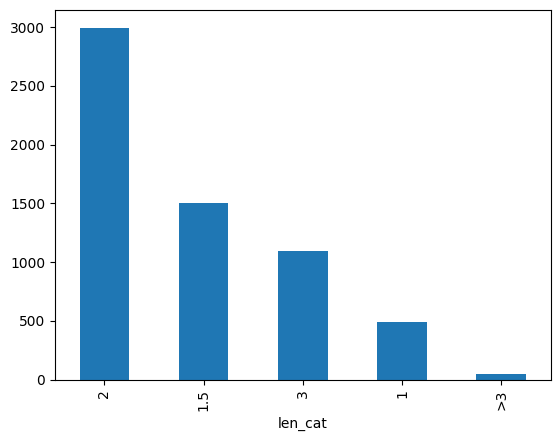

In [13]:
def len_cat(x):
    if x <= 60:
        return "1"
    elif x <= 90:
        return "1.5"
    elif x <= 120:
        return "2"
    elif x <= 180:
        return "3"
    else:
        return ">3"
        
movie['len_cat'] = movie.duration.apply(len_cat)
movie['len_cat'].value_counts().plot(kind='bar')

# Director Focus
Who are the most frequent directors on Netflix for both movies and TV shows? Does specific director involvement correlate with higher content ratings or popularity?

In [14]:
director = df.director.value_counts().nlargest(10).to_frame().reset_index()
director

,director,count
0,Rajiv Chilaka,19
1,"RaÃºl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Suhas Kadav,16
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Youssef Chahine,12
7,Martin Scorsese,12
8,Jay Chapman,12
9,Steven Spielberg,11


In [15]:
(
    director
    .merge(
        df.dropna(subset='country')
          .drop_duplicates(subset='director'), 
        how='left', 
        on='director')
    [['director','count','country']].head
)

<bound method NDFrame.head of                   director  count        country
0            Rajiv Chilaka     19          India
1  RaÃºl Campos, Jan Suter     18         Mexico
2             Marcus Raboy     16  United States
3              Suhas Kadav     16          India
4                Jay Karas     14  United States
5      Cathy Garcia-Molina     13    Philippines
6          Youssef Chahine     12          Egypt
7          Martin Scorsese     12  United States
8              Jay Chapman     12  United States
9         Steven Spielberg     11  United States>